In [1]:
# 05_elasticity_analysis.ipynb
# │
# ├── 1. Imports & configuration
# ├── 2. Data preparation for elasticity
# ├── 3. Price–Quantity relationship (EDA)
# ├── 4. Elasticity estimation
# ├── 5. Elasticity by product / category
# ├── 6. Sanity checks & business interpretation
# └── 7. Outputs for pricing optimization


In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt

from src.elasticity.elasticity import *


In [2]:
df = pd.read_csv(
    "../data/processed/indian_machinery_transaction_data_3.csv",
    parse_dates=["invoice_date"]
)

df.head()

,invoice_id,invoice_date,year,month,season,customer_type,brand,product_name,product_category,specification,quantity,mrp,selling_price,unit_cost,discount_pct,revenue,profit
0,500001,2019-01-01,2019,1,Winter,Retail,Supreme,PVC Pipe,Pipe,0.5 inch,1,89.61,83.49,70.69,6.83,83.49,12.80
1,500061,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Heavy Duty,2,2257.78,2224.77,1902.32,1.46,4449.54,644.90
2,500060,2019-01-01,2019,1,Winter,Contractor,Jain,Sprinkler Set,Irrigation,Mini,2,1446.31,1334.39,1222.70,7.74,2668.78,223.38
3,500059,2019-01-01,2019,1,Winter,Farmer,Jain,Sprinkler Set,Irrigation,Mini,1,1446.31,1195.99,1021.78,17.31,1195.99,174.21
4,500058,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Mini,3,1446.31,1423.58,1200.86,1.57,4270.74,668.16


In [3]:
results_df, weekly_df = elasticity_pipeline_with_models(
    df=df,
)


In [4]:
results_df=results_df[(results_df['price_elasticity']<-0.0000001) | (results_df['price_elasticity']>0.0000001)]

In [6]:
(
    results_df
    .sort_values(["product_id", "test_mape"])
    .groupby("product_id")
    .head(3)
)


,product_id,model,test_mape,n_train_weeks,n_test_weeks,price_elasticity
0,cpvc_pipe__1_5_inch,OLS,15.055364,270,67,-0.270416
1,cpvc_pipe__1_5_inch,Ridge,15.135214,270,67,-0.020231
6,cpvc_pipe__1_inch,OLS,16.217450,270,67,-0.060370
7,cpvc_pipe__1_inch,Ridge,16.507682,270,67,0.016765
12,cpvc_pipe__2_inch,OLS,12.840624,270,67,0.012885
...,...,...,...,...,...,...
180,sprinkler_set__heavy_duty,OLS,16.426211,270,67,-0.517525
186,sprinkler_set__mini,OLS,16.172699,270,67,-0.564986
187,sprinkler_set__mini,Ridge,16.469462,270,67,-0.091041
192,thread_tape__standard,OLS,15.233727,270,67,-0.158883


In [7]:
best_models = (
    results_df
    .sort_values("test_mape")
    .groupby("product_id")
    .first()
    .reset_index()
)

best_models


,product_id,model,test_mape,n_train_weeks,n_test_weeks,price_elasticity
0,cpvc_pipe__1_5_inch,OLS,15.055364,270,67,-0.270416
1,cpvc_pipe__1_inch,OLS,16.217450,270,67,-0.060370
2,cpvc_pipe__2_inch,OLS,12.840624,270,67,0.012885
3,drip_irrigation_kit__0_5_acre,Ridge,18.002415,270,67,-0.221562
4,drip_irrigation_kit__1_acre,OLS,17.463593,270,67,-0.349064
5,drip_irrigation_kit__2_acre,OLS,15.396152,270,67,0.039173
6,foot_valve__1_inch,OLS,15.046076,270,67,-0.460719
7,motor_pump__0_5_hp_single_phase,Ridge,15.088422,270,67,-0.022458
8,motor_pump__1_5_hp_single_phase,Ridge,16.767162,270,67,-0.034159
9,motor_pump__1_hp_single_phase,OLS,17.626395,270,67,-0.433106


In [ ]:
best_models[[
    "product_id",
    "model",
    "price_elasticity",
    "test_mape"
]]


,product_id,model,price_elasticity,test_mape
0,cpvc_pipe__1_5_inch,OLS,-0.270416,15.055364
1,cpvc_pipe__1_inch,OLS,-0.060370,16.217450
2,cpvc_pipe__2_inch,OLS,0.012885,12.840624
3,drip_irrigation_kit__0_5_acre,Ridge,-0.221562,18.002415
4,drip_irrigation_kit__1_acre,OLS,-0.349064,17.463593
5,drip_irrigation_kit__2_acre,OLS,0.039173,15.396152
6,foot_valve__1_inch,OLS,-0.460719,15.046076
7,motor_pump__0_5_hp_single_phase,Ridge,-0.022458,15.088422
8,motor_pump__1_5_hp_single_phase,Ridge,-0.034159,16.767162
9,motor_pump__1_hp_single_phase,OLS,-0.433106,17.626395


### Save the elasticities in data

In [16]:
best_models.to_csv('../data/external/elasticity.csv',index=False)

Negative elasticities indicate demand sensitivity to price increases.
Lagged price effects capture delayed customer response,
common in durable and machinery products.


- ElasticNet offers the best balance between interpretability and accuracy
- Lagged price and demand significantly improve model stability
- Tree models outperform on prediction but lack economic interpretability


### Elasticity distribution across products

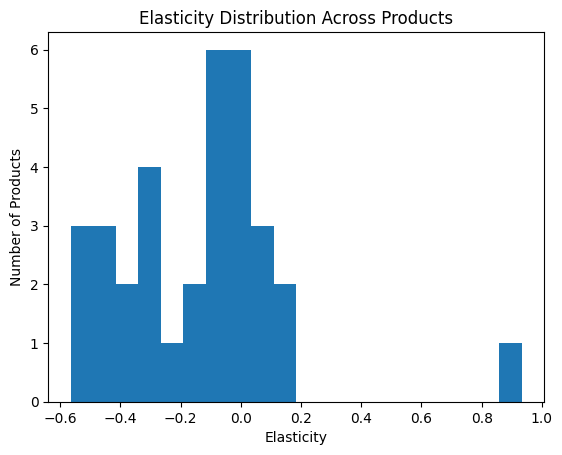

In [9]:
plt.figure()
plt.hist(best_models['price_elasticity'], bins=20)
plt.xlabel("Elasticity")
plt.ylabel("Number of Products")
plt.title("Elasticity Distribution Across Products")
plt.show()
